In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image

In [4]:
# Load data

image_dir = "CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


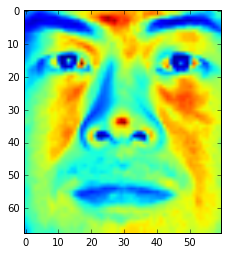

In [5]:
plt.imshow(imgs[1]) # Display first image

In [6]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size

# Compute input matrix X
X_list = [np.ravel(imgs[i].getdata()) for i in range(n)]
X = np.array(X_list, dtype=np.float32)
print(X.shape)

(38, 4080)


## Iterative least-squares

In [30]:
k = 10
epochs = 150

N, M = X.shape
U = np.random.random([k, N])
V = np.random.random([k, M])

for epoch in range(epochs):
    A_V = np.dot(U, U.T)
    B_V = -np.dot(U, X)
    
    A_U = np.dot(V, V.T)
    B_U = -np.dot(V, X.T)
    
    V_new, _, _, _ = np.linalg.lstsq(A_V, B_V)
    U_new, _, _, _ = np.linalg.lstsq(A_U, B_U)
    
    U = U_new
    V = V_new

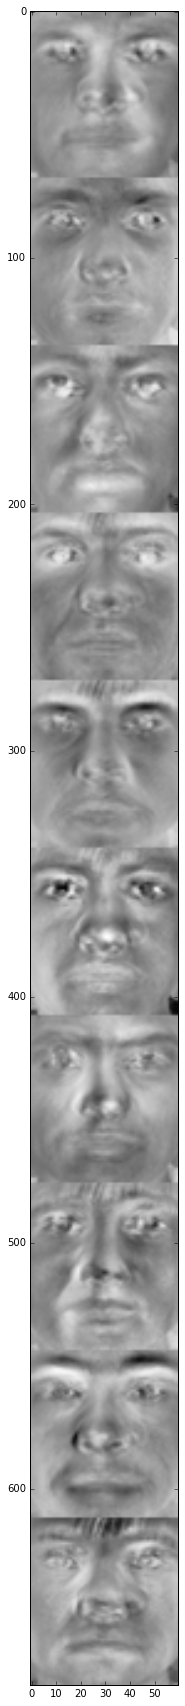

In [34]:
# Plot the resulting images stored in the columns of V
from pylab import rcParams
rcParams['figure.figsize'] = 10, 30

new_images_stacked = np.reshape(V, (-1, width))
fig1 = plt.figure()
plt.imshow(new_images_stacked, cmap='Greys')